In [2]:
from society import Society
import matplotlib.pyplot as plt
import numpy as np

max_days
max_days
max_days
max_days
max_days
max_days
max_days
max_days
max_days
max_days
Wall time: 30.3 s


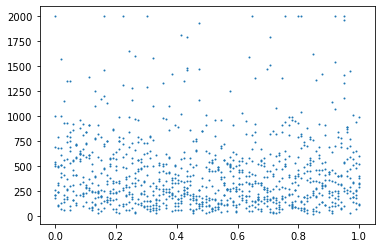

In [11]:
%%time

# Creative_density

# meta parameters
space_size = 41 # prime number provides opportunity for everyone
agents_density = 0.4
init_step = tuple([1, 3])
field_range = 5
field_force = 1

max_days = 2000
tolerance = 0.01 # percentage of agents left
iterations_per_example = 10

creative_density_list = np.linspace(0, 1, 100)
X = []
for i in creative_density_list:
    X.extend([i]*iterations_per_example)
Y = []
for society in [Society(space_size=space_size, agents_density=agents_density
                        , field_range=field_range, field_force=field_force, init_step=init_step
                        , creative_density=c) for c in creative_density_list]:
    for _ in range(iterations_per_example):
        society.new_society()
        global sum_days
        sum_days = 0
        _counter = 0
        while society.get_all_progress() < (1 - tolerance) and _counter < max_days:
            society.next_step()
            _counter += 1
        sum_days += society.day
        Y.append(society.day)
        if _counter==max_days:
            print("max_days")
        
plt.plot(X, Y, "o", markersize=1)

Wall time: 29.7 s


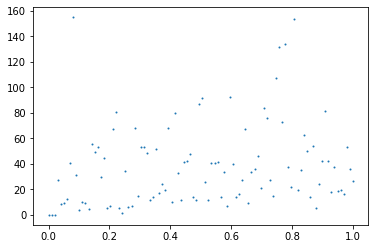

In [4]:
%%time

# Agent density

# meta parameters
space_size = 41 # prime number provides opportunity for everyone
creative_density = 0.5
init_step = tuple([1, 3])
field_range = 5
field_force = 1

max_days = 2000
tolerance = 0.01 # percentage of agents left
iterations_per_example = 10

agent_density_list = np.linspace(0, 1, 100)
X = agent_density_list
Y = []
for society in [Society(space_size=space_size, creative_density=creative_density
                        , field_range=field_range, field_force=field_force, init_step=init_step
                        , agents_density=d) for d in agent_density_list]:
    for _ in range(iterations_per_example):
        society.new_society()
        sum_days = 0
        _counter = 0
        while society.get_all_progress() < (1 - tolerance) and _counter < max_days:
            society.next_step()
            _counter += 1
        sum_days += society.day
    Y.append(sum_days/iterations_per_example)
        
plt.plot(X, Y, "o", markersize=1)